# 2월 마지막주 데이터 분석

## (1) 주가 크롤링_오리온

### 오리온 주가 분석
* 목표
    - 오리온 기업의 전체 일별 주가를 수집하여 전체 주식의 흐름 분석
    - 주식의 흐름에 따른 최적의 투자 포인트 분석
    - 투자 포인트에 영향을 주는 요소 분석
    - 기업분석
    - 주식분석
        - URL:https://finance.naver.com/item/sise.nhn?code=271560
        - 일별현황
    

### 오리온 기업개요
* 개요
    - 형태:주식회사
    - 산업 분야:제조
    - 창립:2017년 6월 1일
    - 전신:동양제과공업㈜
    - 동양제과㈜
    - ㈜오리온
    - 시장코드:한국: 271560
    - 대표자:이경재 (대표이사 사장)
    - 사업 내용:코코아 제품 및 과자류 제조업
    - 제품:파이, 초콜릿, 스낵, 껌, 비스킷, 캔디
    - 자본금:19,766,980,500원 (2018.12)
    - 매출액:1,926,947,888,826원 (2018)
    - 영업이익:282,175,028,930원 (2018)
    - 순이익:143,026,319,852원 (2018)
    - 자산총액:2,351,350,662,439원 (2018.12)

        

* 대표 : 이경재
    - 성향 
    - 고졸 영업사원 출신으로 대기업 사장 자리까지 오른 인물
    - 오리온의 이경재 대표이사 사장
    - 사장은 영업 관리·기획, 사업부장 등 실무진 출신
    - 2007년부터 7년여간 베트남 법인장 베트남 시장 공략 
    - 베트남에서 '대박'을 일궈낸 이 사장은 지난 2015년 한국법인장을 거친 뒤 
    - 지난해 9월 오리온 대표로 선임됐다.
    - 올 상반기 오리온의 영업이익 1332억원으로 지난해 대비 120.4% 증가시킴
    -  이슈
        * 신입사원 입사 지원서에 부모님 '학력' 적게 해 논란
        * 앞으로 10년 동안 모든 훈련병에 '초코파이' 후원하겠다고 나선 오리온
        * 일본 제품 표절 시비 걸린 '마켓오 생초콜릿'
        * 고소한 맛으로 대륙 입맛까지 사로잡은 꼬북칩, 누적 판매량 '1억 봉' 달성
        * 노조탈퇴 강요, 인사 불이익 등 갑질 사건 터져 벌금형 받은 영업소 관리자

# 금융분석
 * 일일 주가분석
    - url:https://finance.naver.com/item/sise_day.nhn?code=271560&page=2
            

In [2]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup as bsp
import matplotlib as mpl
import matplotlib.pyplot as plt
import sqlite3

In [46]:
code=271560
pgno=2
url='https://finance.naver.com/item/sise_day.nhn?code={0}&page={1}'
tgurl=url.format(code,pgno)
tgurl

'https://finance.naver.com/item/sise_day.nhn?code=271560&page=2'

In [60]:
def getPage(tgurl):
    headerdata = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.182 Safari/537.36',
    }
    src=requests.get(tgurl,headers=headerdata)
    cont=src.content.strip()
    html=bsp(cont, 'html.parser')
    tgts=html.select("table.type2 tr")
    stocklist=[]
    for t in tgts:
        sday=t.select(".gray03")
        tds=t.select('td')
        if(sday):
            tkey=sday[0].text.replace('.','')
            tday=sday[0].text.replace('.','-')
            topen=tds[3].text.replace(',','')
            thigh=tds[4].text.replace(',','')
            tlow=tds[5].text.replace(',','')
            tclose=tds[1].text.replace(',','')
            tvol=tds[6].text.replace(',','')
            stocklist.append([tday,topen,thigh,tlow,tclose,tvol,tkey])
    return stocklist

In [61]:
def dataprs(d=[]):
    dbname='stockdata.db'
    with sqlite3.connect(dbname) as conn:
        cur=conn.cursor()
        if d :
            sql='select skey from stockp where skey={}'.format(d[6])
            checkkey=cur.execute(sql).fetchall()
            if checkkey:
                print("중복있음:",d[6])
            else:
                sql="insert into stockp (sday,sopen,shigh,slow,sclose,svol,skey) values(?,?,?,?,?,?,?)"
                cur.execute(sql,d)
                print('입력완료 - ',d[0])
        else:
            sql='select * from stockp'
            result=cur.execute(sql).fetchall()
            print(result)

In [62]:
for i in range(1,90):
    tgurl=url.format(code,i)
    slist=getPage(tgurl)
    for s in slist:
        dataprs(s)

입력완료 -  2021-02-23
입력완료 -  2021-02-22
입력완료 -  2021-02-19
입력완료 -  2021-02-18
입력완료 -  2021-02-17
입력완료 -  2021-02-16
입력완료 -  2021-02-15
입력완료 -  2021-02-10
입력완료 -  2021-02-09
입력완료 -  2021-02-08
중복있음: 20210205
중복있음: 20210204
중복있음: 20210203
중복있음: 20210202
중복있음: 20210201
중복있음: 20210129
중복있음: 20210128
중복있음: 20210127
중복있음: 20210126
중복있음: 20210125
입력완료 -  2021-01-22
입력완료 -  2021-01-21
입력완료 -  2021-01-20
입력완료 -  2021-01-19
입력완료 -  2021-01-18
입력완료 -  2021-01-15
입력완료 -  2021-01-14
입력완료 -  2021-01-13
입력완료 -  2021-01-12
입력완료 -  2021-01-11
입력완료 -  2021-01-08
입력완료 -  2021-01-07
입력완료 -  2021-01-06
입력완료 -  2021-01-05
입력완료 -  2021-01-04
입력완료 -  2020-12-30
입력완료 -  2020-12-29
입력완료 -  2020-12-28
입력완료 -  2020-12-24
입력완료 -  2020-12-23
입력완료 -  2020-12-22
입력완료 -  2020-12-21
입력완료 -  2020-12-18
입력완료 -  2020-12-17
입력완료 -  2020-12-16
입력완료 -  2020-12-15
입력완료 -  2020-12-14
입력완료 -  2020-12-11
입력완료 -  2020-12-10
입력완료 -  2020-12-09
입력완료 -  2020-12-08
입력완료 -  2020-12-07
입력완료 -  2020-12-04
입력완료 -  2020-12-03
입력완료 -  2020-1

In [41]:
dataprs(['2021-01-26', '127500', '128000', '123000', '123000', '189918', '20210126'])

입력완료


In [42]:
dataprs()

[(4, 20210125, '2021-01-25', 123000, 127500, 122500, 126000, 211222), (5, 20210126, '2021-01-26', 127500, 128000, 123000, 123000, 189918)]


## (2) 일희일비 매매

In [14]:
def getDB():
    dbname='stockdata.db'
    with sqlite3.connect(dbname) as conn:
        cur=conn.cursor()
        sql='select * from stockp order by skey asc'
        qry=cur.execute(sql)
        desc=[row[0] for row in qry.description]
        data=qry.fetchall()
    return((desc,data))

In [15]:
res=getDB()
res[0]

['sidx', 'skey', 'sday', 'sopen', 'shigh', 'slow', 'sclose', 'svol']

In [17]:

df=pd.DataFrame(data=res[1],columns=res[0]).set_index('sidx')
df.head()

,skey,sday,sopen,shigh,slow,sclose,svol
sidx,,,,,,,
895,20170707,2017-07-07,87100,89700,75700,82300,1619864
894,20170710,2017-07-10,82300,88000,81000,88000,840451
893,20170711,2017-07-11,88000,88000,82700,82800,422303
892,20170712,2017-07-12,83700,84600,80000,83500,238407
891,20170713,2017-07-13,83400,84000,80800,81600,218138


<AxesSubplot:xlabel='sday'>

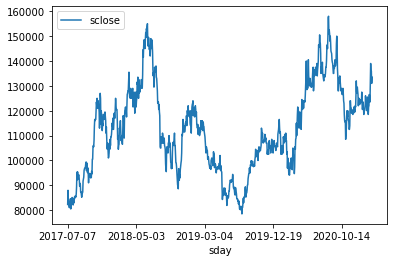

In [18]:
df.plot.line(x='sday',y='sclose')

In [24]:
cdf=df[['sday','sclose']].copy()
cdf.head()

,sday,sclose
sidx,,
895,2017-07-07,82300
894,2017-07-10,88000
893,2017-07-11,82800
892,2017-07-12,83500
891,2017-07-13,81600


In [27]:
cdf['preday']=cdf['sclose'].shift(1)
cdf=cdf.fillna(0)
cdf.head()

,sday,sclose,preday
sidx,,,
895,2017-07-07,82300,0.0
894,2017-07-10,88000,82300.0
893,2017-07-11,82800,88000.0
892,2017-07-12,83500,82800.0
891,2017-07-13,81600,83500.0


In [34]:
cdf.loc[895,'sclose']>cdf.loc[895,'preday']

True

In [37]:
cdf['updown']=(cdf['sclose']>cdf['preday']).astype(int)
cdf.head()

,sday,sclose,preday,updown
sidx,,,,
895,2017-07-07,82300,0.0,1
894,2017-07-10,88000,82300.0,1
893,2017-07-11,82800,88000.0,0
892,2017-07-12,83500,82800.0,1
891,2017-07-13,81600,83500.0,0


In [39]:
cdf['preupdown']=cdf['updown'].shift(1)
cdf=cdf.fillna(0)
cdf.head()

,sday,sclose,preday,updown,preupdown
sidx,,,,,
895,2017-07-07,82300,0.0,1,0.0
894,2017-07-10,88000,82300.0,1,1.0
893,2017-07-11,82800,88000.0,0,1.0
892,2017-07-12,83500,82800.0,1,0.0
891,2017-07-13,81600,83500.0,0,1.0


### 투자 포인트 설정
* 즉시 매도 매수 포지션
* updown: 전일보다 상승 했는가?
* preupdown: 전일 상승 중이었는가?
* sellpos: 전일보다 상승 했으면 매수1 전일보다 하락했으면 매도-1 하락중이거나 상승중이면 홀드0

In [57]:
cdf['sellpos']= np.where(cdf['updown']>cdf['preupdown'],1,0)+np.where(cdf['updown']<cdf['preupdown'],-1,0)
cdf.head()

,sday,sclose,preday,updown,preupdown,sellpos
sidx,,,,,,
895,2017-07-07,82300,0.0,1,0.0,1
894,2017-07-10,88000,82300.0,1,1.0,0
893,2017-07-11,82800,88000.0,0,1.0,-1
892,2017-07-12,83500,82800.0,1,0.0,1
891,2017-07-13,81600,83500.0,0,1.0,-1


### 거래 가치 분석 1 : 최초일 종가로 1주 들고 시작
* deb 통장잔고: 현찰
* instock 주식잔고: 주식보유수 
* cre 주식 가치:

In [71]:
def finprs(df):
    fdf=df.copy()
    precre=82300 # 이전 주식 잔고
    predeb=0 # 이전 통장 잔고
    prestock=1
    for idx,row in fdf.iterrows():
         # 살수 있는 주식의 갯수
        #사라는 신호가 왔고 주식잔고는 없다  통장에 잔고(주식을 살만한)가 있는지?
        if (row.loc['sellpos']==1 and prestock==0):
            canbuy=predeb//row.loc['sclose']
            if(canbuy>0):
                #산다
                cre=precre+canbuy*row.loc['sclose']
                deb=predeb-canbuy*row.loc['sclose']
                instock=canbuy
            else:# 돈없어서 아무일 없다
                instock=prestock
                cre=precre
                deb=predeb                
        # 팔라는 신호가 왔고 주식은 있다---> 판다
        elif (row.loc['sellpos']==-1 and prestock>0):
            cre=0
            deb=predeb+row.loc['sclose']*prestock
            instock=0
            # sellpos:1 prestock:1,sellpos:-1 prestock:0, no debt
        else:# 조건이 안맞아서 아무일 없다.
            instock=prestock
            cre=precre
            deb=predeb
        fdf.loc[idx,'hasstock']=instock
        fdf.loc[idx,'debt']=deb
        fdf.loc[idx,'credit']=cre
        prestock=instock
        precre=cre
        predeb=deb
    return fdf
rdf=finprs(cdf)
rdf.head(20)

,sday,sclose,preday,updown,preupdown,sellpos,hasstock,debt,credit
sidx,,,,,,,,,
895,2017-07-07,82300,0.0,1,0.0,1,1.0,0.0,82300.0
894,2017-07-10,88000,82300.0,1,1.0,0,1.0,0.0,82300.0
893,2017-07-11,82800,88000.0,0,1.0,-1,0.0,82800.0,0.0
892,2017-07-12,83500,82800.0,1,0.0,1,0.0,82800.0,0.0
891,2017-07-13,81600,83500.0,0,1.0,-1,0.0,82800.0,0.0
890,2017-07-14,81000,81600.0,0,0.0,0,0.0,82800.0,0.0
889,2017-07-17,82200,81000.0,1,0.0,1,1.0,600.0,82200.0
888,2017-07-18,83300,82200.0,1,1.0,0,1.0,600.0,82200.0
887,2017-07-19,84600,83300.0,1,1.0,0,1.0,600.0,82200.0


In [70]:
rdf.tail(10)

,sday,sclose,preday,updown,preupdown,sellpos,hasstock,debt,credit
sidx,,,,,,,,,
25,2021-02-08,122000,121500.0,1,1.0,0,0.0,79100.0,0.0
24,2021-02-09,126500,122000.0,1,1.0,0,0.0,79100.0,0.0
23,2021-02-10,125000,126500.0,0,1.0,-1,0.0,79100.0,0.0
22,2021-02-15,123500,125000.0,0,0.0,0,0.0,79100.0,0.0
21,2021-02-16,131500,123500.0,1,0.0,1,0.0,79100.0,0.0
20,2021-02-17,139000,131500.0,1,1.0,0,0.0,79100.0,0.0
19,2021-02-18,135500,139000.0,0,1.0,-1,0.0,79100.0,0.0
18,2021-02-19,136000,135500.0,1,0.0,1,0.0,79100.0,0.0
17,2021-02-22,131000,136000.0,0,1.0,-1,0.0,79100.0,0.0


<AxesSubplot:xlabel='sday'>

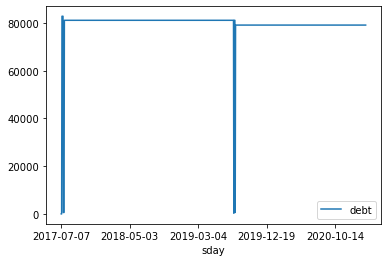

In [73]:
rdf.plot.line(x='sday',y='debt')

### 거래 가치 분석 2 : 현금 100만원 들고 시작
* deb 통장잔고: 현찰
* instock 주식잔고: 주식보유수 
* cre 주식 가치:

In [79]:
def finprs(df):
    fdf=df.copy()
    precre=0 # 이전 주식 잔고
    predeb=1000000 # 이전 통장 잔고
    prestock=0
    for idx,row in fdf.iterrows():
         # 살수 있는 주식의 갯수
        #사라는 신호가 왔고 주식잔고는 없다  통장에 잔고(주식을 살만한)가 있는지?
        if (row.loc['sellpos']==1 and prestock==0):
            canbuy=predeb//row.loc['sclose']
            if(canbuy>0):
                #산다
                cre=precre+canbuy*row.loc['sclose']
                deb=predeb-canbuy*row.loc['sclose']
                instock=canbuy
            else:# 돈없어서 아무일 없다
                instock=prestock
                cre=precre
                deb=predeb                
        # 팔라는 신호가 왔고 주식은 있다---> 판다
        elif (row.loc['sellpos']==-1 and prestock>0):
            cre=0
            deb=predeb+row.loc['sclose']*prestock
            instock=0
            # sellpos:1 prestock:1,sellpos:-1 prestock:0, no debt
        else:# 조건이 안맞아서 아무일 없다.
            instock=prestock
            cre=precre
            deb=predeb
        fdf.loc[idx,'hasstock']=instock
        fdf.loc[idx,'debt']=deb
        fdf.loc[idx,'credit']=cre
        prestock=instock
        precre=cre
        predeb=deb
    return fdf
rdf=finprs(cdf)
rdf.head(20)

,sday,sclose,preday,updown,preupdown,sellpos,hasstock,debt,credit
sidx,,,,,,,,,
895,2017-07-07,82300,0.0,1,0.0,1,12.0,12400.0,987600.0
894,2017-07-10,88000,82300.0,1,1.0,0,12.0,12400.0,987600.0
893,2017-07-11,82800,88000.0,0,1.0,-1,0.0,1006000.0,0.0
892,2017-07-12,83500,82800.0,1,0.0,1,12.0,4000.0,1002000.0
891,2017-07-13,81600,83500.0,0,1.0,-1,0.0,983200.0,0.0
890,2017-07-14,81000,81600.0,0,0.0,0,0.0,983200.0,0.0
889,2017-07-17,82200,81000.0,1,0.0,1,11.0,79000.0,904200.0
888,2017-07-18,83300,82200.0,1,1.0,0,11.0,79000.0,904200.0
887,2017-07-19,84600,83300.0,1,1.0,0,11.0,79000.0,904200.0


In [80]:
rdf.tail(10)

,sday,sclose,preday,updown,preupdown,sellpos,hasstock,debt,credit
sidx,,,,,,,,,
25,2021-02-08,122000,121500.0,1,1.0,0,4.0,34100.0,486000.0
24,2021-02-09,126500,122000.0,1,1.0,0,4.0,34100.0,486000.0
23,2021-02-10,125000,126500.0,0,1.0,-1,0.0,534100.0,0.0
22,2021-02-15,123500,125000.0,0,0.0,0,0.0,534100.0,0.0
21,2021-02-16,131500,123500.0,1,0.0,1,4.0,8100.0,526000.0
20,2021-02-17,139000,131500.0,1,1.0,0,4.0,8100.0,526000.0
19,2021-02-18,135500,139000.0,0,1.0,-1,0.0,550100.0,0.0
18,2021-02-19,136000,135500.0,1,0.0,1,4.0,6100.0,544000.0
17,2021-02-22,131000,136000.0,0,1.0,-1,0.0,530100.0,0.0


<AxesSubplot:xlabel='sday'>

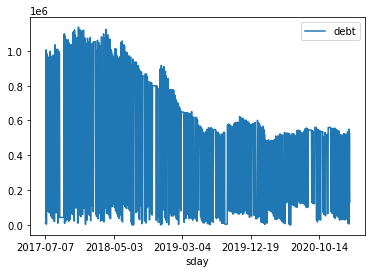

In [81]:
rdf.plot.line(x='sday',y='debt')

## (3) 이동평균선 이용 매매

In [8]:
def mvline(src=[],mday=5):
    mvdata=[0 for i in range(mday-1)]
    mvdata
    tot =len(src) # 이 매개체 덕에 2for X
    for i in range(tot-mday+1):
        mvm=np.mean(cdf['sclose'][i:mday+i])
        mvdata.append(mvm)
    return (mvdata)

In [18]:
mvline(cdf,5)

[0,
 0,
 0,
 0,
 83640.0,
 83380.0,
 82220.0,
 82320.0,
 82540.0,
 82320.0,
 82360.0,
 82520.0,
 82520.0,
 82620.0,
 83360.0,
 84080.0,
 83900.0,
 83940.0,
 83500.0,
 83400.0,
 83500.0,
 84200.0,
 84500.0,
 85040.0,
 85360.0,
 85600.0,
 86360.0,
 88420.0,
 89740.0,
 91760.0,
 92960.0,
 93800.0,
 93600.0,
 93940.0,
 93300.0,
 92720.0,
 92160.0,
 91360.0,
 90040.0,
 89080.0,
 88440.0,
 87320.0,
 86520.0,
 86440.0,
 86420.0,
 87480.0,
 88940.0,
 90340.0,
 92160.0,
 94020.0,
 95080.0,
 96000.0,
 96840.0,
 97460.0,
 98020.0,
 97800.0,
 98180.0,
 98280.0,
 97480.0,
 97000.0,
 96820.0,
 95220.0,
 94420.0,
 94260.0,
 93820.0,
 93580.0,
 94140.0,
 93940.0,
 94020.0,
 93680.0,
 94040.0,
 94200.0,
 95700.0,
 96860.0,
 99340.0,
 101420.0,
 103600.0,
 105100.0,
 107700.0,
 109900.0,
 111900.0,
 114100.0,
 115800.0,
 117200.0,
 118600.0,
 119800.0,
 121500.0,
 122400.0,
 122500.0,
 122600.0,
 122600.0,
 121900.0,
 121600.0,
 120000.0,
 118800.0,
 119800.0,
 120500.0,
 119500.0,
 120900.0,
 121000.0,

In [10]:
cdf['mvshort']=mvline(cdf['sclose'],5)
cdf['mvlong']=mvline(cdf['sclose'],20)

In [11]:
cdf.head(20)

,sday,sclose,mvshort,mvlong
sidx,,,,
929,2017-07-07,82300,0.0,0.0
928,2017-07-10,88000,0.0,0.0
927,2017-07-11,82800,0.0,0.0
926,2017-07-12,83500,0.0,0.0
925,2017-07-13,81600,83640.0,0.0
924,2017-07-14,81000,83380.0,0.0
923,2017-07-17,82200,82220.0,0.0
922,2017-07-18,83300,82320.0,0.0
921,2017-07-19,84600,82540.0,0.0


In [12]:
cdf['shortpos']=np.where(cdf['mvshort']>cdf['mvlong'],1,-1) * np.where(cdf['mvlong']==0,0,1)
redf=cdf.set_index('sday')
redf.head()

,sclose,mvshort,mvlong,shortpos
sday,,,,
2017-07-07,82300,0.0,0.0,0
2017-07-10,88000,0.0,0.0,0
2017-07-11,82800,0.0,0.0,0
2017-07-12,83500,0.0,0.0,0
2017-07-13,81600,83640.0,0.0,0


In [13]:
redf['preshortpos']=redf['shortpos'].shift(1)
redf.tail(20)

,sclose,mvshort,mvlong,shortpos,preshortpos
sday,,,,,
2021-01-25,126000,121700.0,122700.0,-1,-1.0
2021-01-26,123000,122200.0,122600.0,-1,-1.0
2021-01-27,123500,122900.0,122625.0,1,-1.0
2021-01-28,123000,123400.0,122650.0,1,1.0
2021-01-29,120000,123100.0,122450.0,1,1.0
2021-02-01,123000,122500.0,122450.0,1,1.0
2021-02-02,125500,123000.0,122525.0,1,1.0
2021-02-03,122500,122800.0,122425.0,1,1.0
2021-02-04,118500,121900.0,122175.0,-1,1.0


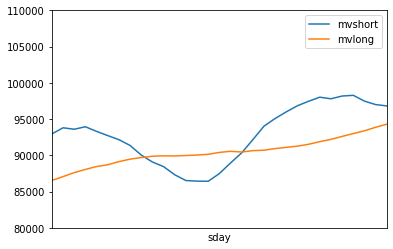

In [14]:
redf[['mvshort','mvlong']].plot()
plt.xlim(30,60)
plt.ylim(80000,110000)
plt.show()

In [15]:
df

,skey,sday,sopen,shigh,slow,sclose,svol
sidx,,,,,,,
929,20170707,2017-07-07,87100,89700,75700,82300,1619864
928,20170710,2017-07-10,82300,88000,81000,88000,840451
927,20170711,2017-07-11,88000,88000,82700,82800,422303
926,20170712,2017-07-12,83700,84600,80000,83500,238407
925,20170713,2017-07-13,83400,84000,80800,81600,218138
...,...,...,...,...,...,...,...
44,20210217,2021-02-17,132000,143500,130000,139000,425574
43,20210218,2021-02-18,138500,138500,134000,135500,211973
42,20210219,2021-02-19,135000,137000,131500,136000,174957


In [16]:
# 100만원을 가지고 orion주식 투자 시뮬레이션
def finprs(df):
    fdf=df.copy()
    precre=0 # 이전 주식 잔고
    predeb=1000000 # 이전 통장 잔고
    prestock=0
    for idx,row in fdf.iterrows():
         # 살수 있는 주식의 갯수
        #단기물 곡선이 하위 포지션에 있다가 장기물 곡선을 크로스 하였다=> 주가 상승 압력이 시작됬다
        # 상승할것으로 보여지니 매수한다.
        if (row.loc['shortpos']==1 and row.loc['shortpos']*row.loc['preshortpos']<0):
            canbuy=predeb//row.loc['sclose']
            if(canbuy>0):
                #산다
                cre=precre+canbuy*row.loc['sclose']
                deb=predeb-canbuy*row.loc['sclose']
                instock=canbuy
            else:# 돈없어서 아무일 없다
                instock=prestock
                cre=precre
                deb=predeb                
        # 단기물 곡선이 상위포지션에 있다가 장기물 곡선을 크로스했다--> 주가의 하방압력이 시작됬다.
        # 하락할것으로 보여지니 매도한다.
        elif (row.loc['shortpos']==-1 and row.loc['shortpos']*row.loc['preshortpos']<0):
            cre=0
            deb=predeb+row.loc['sclose']*prestock
            instock=0
            # sellpos:1 prestock:1,sellpos:-1 prestock:0, no debt
        else:# 조건이 안맞아서 아무일 없다.
            instock=prestock
            cre=precre
            deb=predeb
        fdf.loc[idx,'hasstock']=instock
        fdf.loc[idx,'debt']=deb
        fdf.loc[idx,'credit']=cre
        prestock=instock
        precre=cre
        predeb=deb
    return fdf


In [17]:
rdf=finprs(redf)
rdf.tail(20)

,sclose,mvshort,mvlong,shortpos,preshortpos,hasstock,debt,credit
sday,,,,,,,,
2021-01-25,126000,121700.0,122700.0,-1,-1.0,0.0,1127100.0,0.0
2021-01-26,123000,122200.0,122600.0,-1,-1.0,0.0,1127100.0,0.0
2021-01-27,123500,122900.0,122625.0,1,-1.0,9.0,15600.0,1111500.0
2021-01-28,123000,123400.0,122650.0,1,1.0,9.0,15600.0,1111500.0
2021-01-29,120000,123100.0,122450.0,1,1.0,9.0,15600.0,1111500.0
2021-02-01,123000,122500.0,122450.0,1,1.0,9.0,15600.0,1111500.0
2021-02-02,125500,123000.0,122525.0,1,1.0,9.0,15600.0,1111500.0
2021-02-03,122500,122800.0,122425.0,1,1.0,9.0,15600.0,1111500.0
2021-02-04,118500,121900.0,122175.0,-1,1.0,0.0,1082100.0,0.0


In [29]:
rdf['totval']=rdf['debt']+rdf['credit']
rdf.tail()

,sclose,mvshort,mvlong,shortpos,preshortpos,hasstock,debt,credit,totval
sday,,,,,,,,,
2021-02-17,139000,129100.0,123825.0,1,1.0,8.0,110100.0,972000.0,1082100.0
2021-02-18,135500,130900.0,124575.0,1,1.0,8.0,110100.0,972000.0,1082100.0
2021-02-19,136000,133100.0,125375.0,1,1.0,8.0,110100.0,972000.0,1082100.0
2021-02-22,131000,134600.0,125900.0,1,1.0,8.0,110100.0,972000.0,1082100.0
2021-02-23,133500,135000.0,126500.0,1,1.0,8.0,110100.0,972000.0,1082100.0


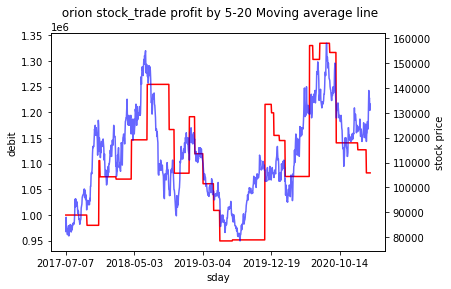

In [41]:
ax1=rdf['totval'].plot(color='r')
ax1.set_ylabel('debit')
ax2 = rdf['sclose'].plot(secondary_y=True, color='b', alpha=0.6)
ax2.set_ylabel('stock price')
plt.title(" orion stock_trade profit by 5-20 Moving average line", y=1.05)
plt.show()

### 이동평균선 최적값

In [13]:
def optmv(cdf,sv=5,lv=10):
    cdf['mvshort']=mvline(cdf['sclose'],sv)
    cdf['mvlong']=mvline(cdf['sclose'],lv)
    cdf['shortpos']=np.where(cdf['mvshort']>cdf['mvlong'],1,-1) * np.where(cdf['mvlong']==0,0,1)
    redf=cdf.set_index('sday')
    redf['preshortpos']=redf['shortpos'].shift(1)
    rdf=finprs(redf)
    rdf['totval']=rdf['debt']+rdf['credit']
    lastrow=rdf.iloc[-1:]
    mylastval=lastrow['totval'].values[0]
    return ((sv,lv,mylastval))

In [14]:
result=[]
for sb in range(2,10):
    for lb in range(sb+1,sb+20):
        res=optmv(cdf,sb,lb)
        result.append(res)

In [15]:
vdf= pd.DataFrame(data=result,columns=["short","long","val"])
vdf.tail()

,short,long,val
147,9,24,974900.0
148,9,25,988800.0
149,9,26,1048000.0
150,9,27,1038800.0
151,9,28,1019800.0


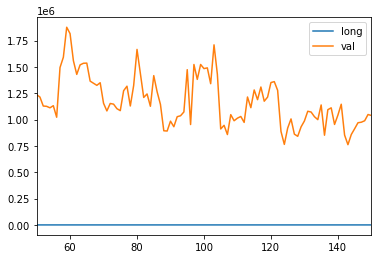

In [21]:
vdf[["long","val"]].plot()
plt.xlim(50,150)
plt.show()

In [17]:
vdf[["val"]].max()
maxrow=vdf.loc[vdf["val"]==1876300.0]
maxrow

,short,long,val
59,5,8,1876300.0


3차원그래프

In [18]:
rv=optmv(cdf)

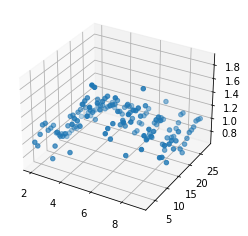

In [19]:
fig=plt.figure()
ax=fig.gca(projection="3d")
x=vdf["short"]
y=vdf["long"]
z=vdf["val"]
ax.scatter(x,y,z)
plt.show()

## (4) 투자보고서 작성



### 시장분석

- 제과산업의 특성
    - 소비자의 독특한 기호와 고급 과자를 중심으로 한 제품증가 및 고급화로 __신제품 개발의 기술 우위__ 가 경쟁 요인으로 작용
    - 최근 제과 업체들은 제품의 고급화, 기능성화를 바탕으로 수익성 제고를 추구

    - 제과산업은 대규모 설비투자가 요구되는 장치산업으로 규모의 경제가 작용하여 높은 진입장벽 존재
    - 상위 업체들의 과점화가 심화되는 경향이 있으며 모방 제품, 광고 및 진열 경쟁 등으로 시장이 치열.
    - 국내 시장은 대형 할인점 및 편의점 증가에 따른 유통구조의 변화 및 수입 브랜드 등의 점유율 확대.
    - 제과 시장은 경쟁이 심화되고 있으며, 히트 제품 출시 여부에 따라 시장 경쟁 구도가 변화가능성이 높다.

    - 해외 사업의 경우 중국을 중심으로 글로벌 업체 및 로컬 업체 간에 전반적인 경쟁 강도가 높아지고 있으며 온라인 유통 채널 활성화 등 유통 채널의 다변화 또한 경쟁요인으로 뽑힌다.

- 제과 산업의 성장성

    - 국내외 경제 불확실성의 증대, 소비 심리 위축 등으로 _경기 둔화_ 가 진행 중
    - 제과 산업은 여타 산업 대비 상대적으로 _수요 민감도가 낮다_.
    - 외식 산업이 성장하고 배달 시스템이 잘 갖춰지면서 제과 산업의 성장폭은 상대적으로 _낮아지고 있다_.
    - 현재 성장세는 비교적 둔화되고 있는 추세이지만 건강성 및 기능성 과자 등으로 _새로운 시장이 확대_ 됨에 따라 _향후 지속적인 성장_ 이 기대

### 기업분석
- 오리온 기업요약:
    - 오리온 그룹 산하 제과 기업 
    - 2017년 6월 1일부로 오리온이 계열사 오리온로부터 분할
    - 주요 시장: 한국, 중국, 베트남, 러시아를 
    - 전년 코로나 상황에도 불구하고 의미있는 성장을 이뤄냄.
    - 2020년 4분기 매출 증가대비 해외시장 이익이 저조
    - 매출 10%가량 성장, 지배주주 주당순이익 24%가량 성장
- 국내시장
    - 초코파이, 포카칩, 스윙칩, 오감자 등 전통적으로 인지도가 높은 상품을 통해 단단한 기반을 확보
    - 08년부터 시장의 웰빙 트렌드를 선도한 기업으로 닥터유, 마켓오 제품들을 히트시키며 프리미엄시장에 상당한 점유율을 확보.

- 해외시장
    - 주요상품: '초코파이 인(仁)', 중국과 베트남 시장을 바탕으로 큰 성장.
    - 해외시장 주요상품의 라인업을 확대에 노력.

- 관련 투자지표
>전년 매출 : 2020년 22,304억  
EPS : 5,453  
BPS : 41,050  
PER : 24.67  
업종PER : 26.66  
PBR : 3.28  
현금배당수익률 : 0.45%  

- 투자 가능성
    - 애널리스트 목표주가: 약 17만원에서 형성. (02/26일 기준)
    - 펀더멘털 대비 주가가 아직 저평가 상태인 것으로 판단하는 분위기

- 의견
    - 기업의 펀더멘털이 안정적으로 형성되어있고 현재 주가대비 목표주가 역시 높게 잡혀있다.
    - 산업군 역시 특별한 이슈가 발생하지 않는 이상 크게 실적이 약화되지 않는 편.
    - 기업외 시장요인이 관련 기술적 투자의 핵심이 될 것으로 보인다.
    - 현 주식시장에 자본이 상당히 몰려있는 상황에서 전문가들의 주식시장에 대한 판단이 갈리는 편.
    - 주가의 큰 상승, 하락에 대한 action plan을 체계화 하여 상황별로 대처 해야할 것이다.

# (4) 캔들차트

In [37]:
# 오후 타임

In [38]:
vdf.to_csv('profit_orion_sim.csv')

In [39]:
!pip install mpl_finance

You should consider upgrading via the 'c:\programdata\anaconda3\envs\study\python.exe -m pip install --upgrade pip' command.


In [45]:
df

,skey,sday,sopen,shigh,slow,sclose,svol
sidx,,,,,,,
929,20170707,2017-07-07,87100,89700,75700,82300,1619864
928,20170710,2017-07-10,82300,88000,81000,88000,840451
927,20170711,2017-07-11,88000,88000,82700,82800,422303
926,20170712,2017-07-12,83700,84600,80000,83500,238407
925,20170713,2017-07-13,83400,84000,80800,81600,218138
...,...,...,...,...,...,...,...
44,20210217,2021-02-17,132000,143500,130000,139000,425574
43,20210218,2021-02-18,138500,138500,134000,135500,211973
42,20210219,2021-02-19,135000,137000,131500,136000,174957


In [44]:
from mpl_finance import candlestick_ohlc


In [55]:
cdf = df.set_index('sday')
candf = cdf[['sopen','shigh','slow','sclose']].astype(int)
candf.head()

,sopen,shigh,slow,sclose
sday,,,,
2017-07-07,87100,89700,75700,82300
2017-07-10,82300,88000,81000,88000
2017-07-11,88000,88000,82700,82800
2017-07-12,83700,84600,80000,83500
2017-07-13,83400,84000,80800,81600


In [63]:
x = np.arange(len(cdf.index))
xs = np.reshape(x,(-1,1))
xs[:5]

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [68]:
ohlc = candf.values
ohlc
canohlc=np.hstack((xs,ohlc))
canohlc
#np.hstack

array([[     0,  87100,  89700,  75700,  82300],
       [     1,  82300,  88000,  81000,  88000],
       [     2,  88000,  88000,  82700,  82800],
       ...,
       [   887, 135000, 137000, 131500, 136000],
       [   888, 137000, 137500, 130500, 131000],
       [   889, 131000, 135000, 130500, 133500]])

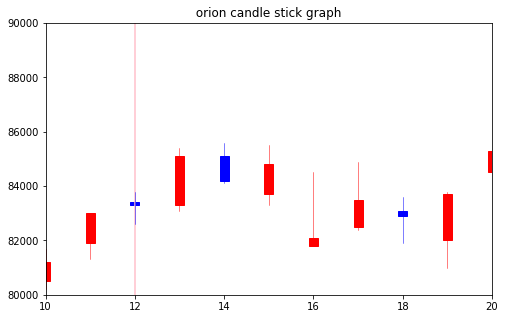

In [75]:
# from mpl_finance import candlestick_ohlc
fig,ax=plt.subplots(figsize=(8,5))
candlestick_ohlc(ax,canohlc, colorup='r', colordown='b')
plt.title(" orion candle stick graph ")
plt.xlim(10,20)
plt.ylim(80000,90000)
plt.vlines(12,80000,90000, color='pink')
plt.show()

In [86]:
df

,skey,sday,sopen,shigh,slow,sclose,svol
sidx,,,,,,,
929,20170707,2017-07-07,87100,89700,75700,82300,1619864
928,20170710,2017-07-10,82300,88000,81000,88000,840451
927,20170711,2017-07-11,88000,88000,82700,82800,422303
926,20170712,2017-07-12,83700,84600,80000,83500,238407
925,20170713,2017-07-13,83400,84000,80800,81600,218138
...,...,...,...,...,...,...,...
44,20210217,2021-02-17,132000,143500,130000,139000,425574
43,20210218,2021-02-18,138500,138500,134000,135500,211973
42,20210219,2021-02-19,135000,137000,131500,136000,174957


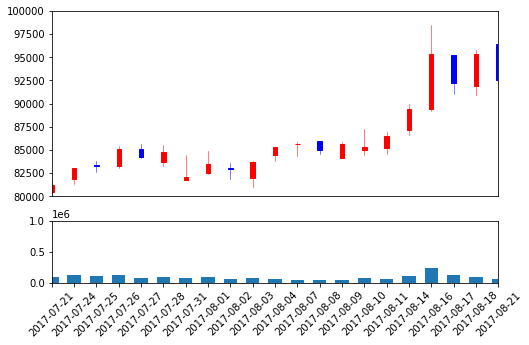

In [93]:
from matplotlib.gridspec import GridSpec
# fig,ax=plt.subplots(figsize=(8,5))
fig=plt.figure(figsize=(8,5))
gs = GridSpec(2,1,height_ratios=[3,1])
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0],sharex=ax1) #x축공유
ax1.get_xaxis().set_visible(False) # 가운데 x축 삭제
candlestick_ohlc(ax1,canohlc, colorup='r', colordown='b')
svol= df['svol'].values #y축
sx=df['sday'].values #x축
ax2.bar(sx,svol, width=0.6)
ax2.set_ylim(0,1000000)
ax1.set_xlim(10,30)
ax1.set_ylim(80000,100000)
plt.xticks(rotation=45)
# plt.title(" orion candle stick graph ")
# plt.xlim(10,20)
# plt.ylim(80000,90000)
# plt.vlines(12,80000,90000, color='pink')
plt.show()

In [77]:
vdff = pd.read_csv('profit_orion_sim.csv')
vdff

,Unnamed: 0,short,long,val
0,0,2,3,1006700.0
1,1,2,4,918100.0
2,2,2,5,1058800.0
3,3,2,6,1168200.0
4,4,2,7,1160100.0
...,...,...,...,...
1057,1057,19,74,1136700.0
1058,1058,19,75,1151200.0
1059,1059,19,76,1135200.0
1060,1060,19,77,1127200.0


## (5) 추가부분

In [24]:
from mpl_finance import candlestick_ohlc


In [60]:
df['mvshort']=df['sclose'].rolling(window=5).mean()
df['mvlong']=df['sclose'].rolling(window=8).mean()
df['stshort']=df['sopen'].rolling(window=5).mean()
df['stlong']=df['sopen'].rolling(window=8).mean()
df['svolb']=df['svol'].shift(1)
# 색정보
df['vcol']=np.where(df['svolb']>df['svol'],'blue','red')
df.fillna(0)

,skey,sday,sopen,shigh,slow,sclose,svol,mvshort,mvlong,stshort,stlong,svolb,vcol
sidx,,,,,,,,,,,,,
895,20170707,2017-07-07,87100,89700,75700,82300,1619864,0.0,0.0,0.0,0.0,0.0,red
894,20170710,2017-07-10,82300,88000,81000,88000,840451,0.0,0.0,0.0,0.0,1619864.0,blue
893,20170711,2017-07-11,88000,88000,82700,82800,422303,0.0,0.0,0.0,0.0,840451.0,blue
892,20170712,2017-07-12,83700,84600,80000,83500,238407,0.0,0.0,0.0,0.0,422303.0,blue
891,20170713,2017-07-13,83400,84000,80800,81600,218138,83640.0,0.0,84900.0,0.0,238407.0,blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,20210217,2021-02-17,132000,143500,130000,139000,425574,129100.0,125937.5,126900.0,124812.5,259119.0,red
19,20210218,2021-02-18,138500,138500,134000,135500,211973,130900.0,128062.5,130000.0,126687.5,425574.0,blue
18,20210219,2021-02-19,135000,137000,131500,136000,174957,133100.0,129875.0,131500.0,128625.0,211973.0,blue


In [50]:
df.head()

,skey,sday,sopen,shigh,slow,sclose,svol,mvshort,mvlong,stshort,stlong
sidx,,,,,,,,,,,
895,20170707,2017-07-07,87100,89700,75700,82300,1619864,NaN,NaN,NaN,NaN
894,20170710,2017-07-10,82300,88000,81000,88000,840451,NaN,NaN,NaN,NaN
893,20170711,2017-07-11,88000,88000,82700,82800,422303,NaN,NaN,NaN,NaN
892,20170712,2017-07-12,83700,84600,80000,83500,238407,NaN,NaN,NaN,NaN
891,20170713,2017-07-13,83400,84000,80800,81600,218138,83640.0,NaN,84900.0,NaN


In [51]:
#이평선용 pandas
cdf=df.set_index('sday').fillna(0)
cdf.head()

,skey,sopen,shigh,slow,sclose,svol,mvshort,mvlong,stshort,stlong
sday,,,,,,,,,,
2017-07-07,20170707,87100,89700,75700,82300,1619864,0.0,0.0,0.0,0.0
2017-07-10,20170710,82300,88000,81000,88000,840451,0.0,0.0,0.0,0.0
2017-07-11,20170711,88000,88000,82700,82800,422303,0.0,0.0,0.0,0.0
2017-07-12,20170712,83700,84600,80000,83500,238407,0.0,0.0,0.0,0.0
2017-07-13,20170713,83400,84000,80800,81600,218138,83640.0,0.0,84900.0,0.0


In [52]:
# 캔들차트용 pandas
candf=cdf[['sopen','shigh','slow','sclose']].astype(int)
candf.head()

,sopen,shigh,slow,sclose
sday,,,,
2017-07-07,87100,89700,75700,82300
2017-07-10,82300,88000,81000,88000
2017-07-11,88000,88000,82700,82800
2017-07-12,83700,84600,80000,83500
2017-07-13,83400,84000,80800,81600


In [53]:
import datetime
from matplotlib.dates import date2num
x=np.arange(len(cdf.index))
xs=np.reshape(x,(-1,1))
xs[:5]

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [54]:
ohlc=candf.values
ohlc
canohlc=np.hstack((xs,ohlc))
canohlc

array([[     0,  87100,  89700,  75700,  82300],
       [     1,  82300,  88000,  81000,  88000],
       [     2,  88000,  88000,  82700,  82800],
       ...,
       [   887, 135000, 137000, 131500, 136000],
       [   888, 137000, 137500, 130500, 131000],
       [   889, 131000, 135000, 130500, 133500]])

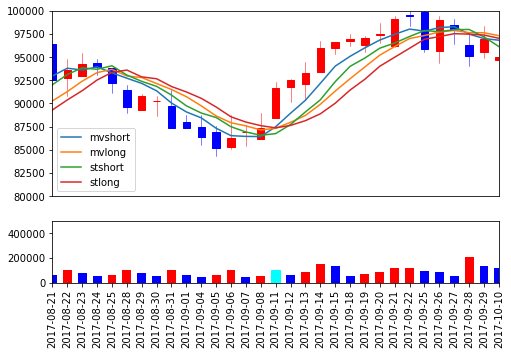

In [62]:
from matplotlib.gridspec import GridSpec

fig=plt.figure(figsize=(8,5))
gs=GridSpec(2,1,height_ratios=[3,1])
ax1=fig.add_subplot(gs[0,0])
ax2=fig.add_subplot(gs[1,0],sharex=ax1) # x 축 공유 
ax1.get_xaxis().set_visible(False) # 가운데 x 축 삭제
candlestick_ohlc(ax1,canohlc,width=0.5, colorup='r', colordown='b')
svol=df['svol'].values # vol
sx=df['sday'].values # x 축 

cdf[['mvshort','mvlong','stshort','stlong']].plot(ax=ax1)
# 바차트 컬러 정보
barc=ax2.bar(sx,svol,width=0.6,color= df['vcol'].values)
# 바차트 한개만 색 바꿀때 # 이벤트 있는 경우
barc[45].set_color('cyan')

ax2.set_ylim(0,500000)
ax1.set_xlim(30,60)
ax1.set_ylim(80000,100000)
plt.xticks(rotation=90)
plt.show()